<a href="https://colab.research.google.com/github/LuisDoc/Applied-Data-Analytics/blob/main/HandsOnPython_03_GrundlagenDatenaufbereitung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands On Python 3 - Datenaufbereitung
Dieses Notebook zeigt wie
- man Daten aus zwei csv Dateien zu einem Datensatz zusammenfügen kann
- wie man mit nicht existenten Werten (NaN - Not a Number) umgeht
- wie man Zeitreihen mit unterschiedlichen Frequenzen auf eine gemeinsame Frequenz bringen kann

## Notwendige Bibliotheken importieren

In [3]:
# notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Daten einlesen

In [7]:
# Daten einlesen

# Daten der 1. Quelle
rawData1 = pd.read_csv('/content/drive/My Drive/source1.csv')

# Lesen Sie die Daten der 2. Quelle ein
rawData2 = pd.read_csv('/content/drive/My Drive/source2.csv')

In [14]:
# Anzahl der Zeilen und Spalten ausgeben 
x = rawData1.shape
y = rawData2.shape

# Geben Sie Zeilen und Spalten des 1. Datensatzes von Quelle 1 aus
print("RawData 1: ", x)
# Geben Sie Zeilen und Spalten des 2. Datensatzes von Quelle 2 aus
print("RawData 2: ", y)

RawData 1:  (135, 5)
RawData 2:  (45, 2)


In [17]:
# Geben Sie die ersten Zeilen von Quelle 1 aus:
rawData1.head(3) #Ausgabe der ersten 3 Zeilen von Quelle 1

,Date,Energy,Light,CO2,Occupancy
0,2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
1,2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2,2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0


In [18]:
# Geben Sie die ersten Zeilen von Quelle 2 aus:
rawData2.head(3) #Ausgabe der ersten 3 Zeilen von Quelle 2

,Date,Temperature
0,2015-02-02 14:00:00,23.657118
1,2015-02-02 15:00:00,23.293950
2,2015-02-02 16:00:00,22.773142


In [19]:
# Geben Sie die letzten Zeilen von Quelle 1 aus:
rawData1.tail(3) #Ausgabe der letzten 3 Zeilen von Quelle 1

,Date,Energy,Light,CO2,Occupancy
132,2015-02-03 23:15:00,25.146556,0.0,559.753333,0.0
133,2015-02-03 23:30:00,25.029479,0.0,555.600000,0.0
134,2015-02-03 23:45:00,24.941250,0.0,553.130952,0.0


In [20]:
# Geben Sie die letzten Zeilen von Quelle 2 aus
rawData2.tail(3) #Ausgabe der letzten 3 Zeilen von Quelle 2

,Date,Temperature
42,2015-02-04 08:00:00,20.957842
43,2015-02-04 09:00:00,22.234915
44,2015-02-04 10:00:00,23.946885


## Daten auf fehlende Werte hin überprüfen

In [39]:
# Geben Sie sich die Anzahl der NaNs in den Spalten von Quelle 2 aus:
rawData2.isnull().sum() #Suche im kompletten Data Frame nach Nullwerten und berechne Summe

Date           0
Temperature    0
dtype: int64

In [122]:
# Sofern der Datensatz keine NaNs erhält --> Kopie der Rohdaten namens data2 erstellen und damit direkt weiterarbeiten:
data2 = (rawData2[rawData2.notnull()]).copy() #Kopiere alle Datensätze, die kein NAN enthalten
data2.sample(10) #Gib Testweise 10 aus

,Date,Temperature
32,2015-02-03 22:00:00,20.905396
37,2015-02-04 03:00:00,20.700750
34,2015-02-04 00:00:00,20.841167
13,2015-02-03 03:00:00,20.470300
8,2015-02-02 22:00:00,20.736664
33,2015-02-03 23:00:00,20.891483
4,2015-02-02 18:00:00,21.993372
40,2015-02-04 06:00:00,20.576972
0,2015-02-02 14:00:00,23.657118
43,2015-02-04 09:00:00,22.234915


In [40]:
# Wie sieht es bei rawData1 aus? Geben Sie für rawData1 die Anzahl der NaNs in den Spalten aus
rawData1.isnull().sum() # Berechne die Summe der NaNs der jeweiligen Spalten

Date          0
Energy        0
Light        10
CO2           0
Occupancy     0
dtype: int64

## Mit NaNs umgehen

### Möglichkeit 1: alle Zeilen, in denen mindestens 1x NaN vorkommt, löschen

In [41]:
# Kopie der Rohdaten anlegen
data1_del = rawData1.copy() 

# Zeilen mit mind. 1x NaN löschen (d.h. in irgendeiner Spalte kommt ein NaN vor --> Zeile wird gelöscht)
data1_del.dropna(inplace=True)

# Überprüfen
data1_del.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

### Möglichkeit 2: Fehlende Werte durch interpolierte Werte ersetzen

### Linear Interpolieren

In [84]:
# Führen Sie eine lineare Interpolation durch. Erstellen Sie sich dazu zunächst data1_ip als Kopie von rawData1
data1_ip = rawData1.copy() #Kopieren von Daten
data1_ip = data1_ip.interpolate()

# Geben Sie sich die Anzahl an NaN in den Spalten nach der Interpolation aus:
data1_ip.isnull().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

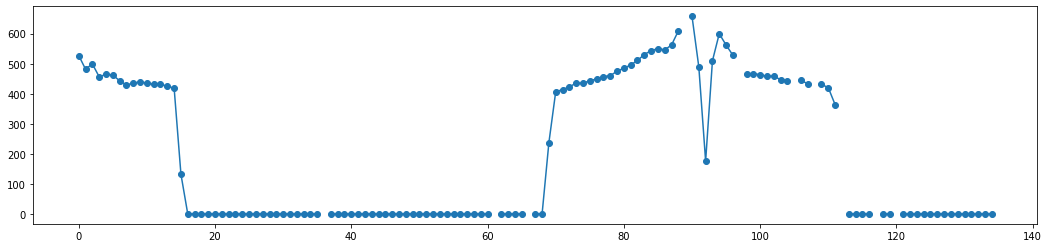

In [75]:
# Plotten der alten Zeitreihe
plt.figure(figsize=(18, 4))
rawData1['Light'].plot(marker='o')   

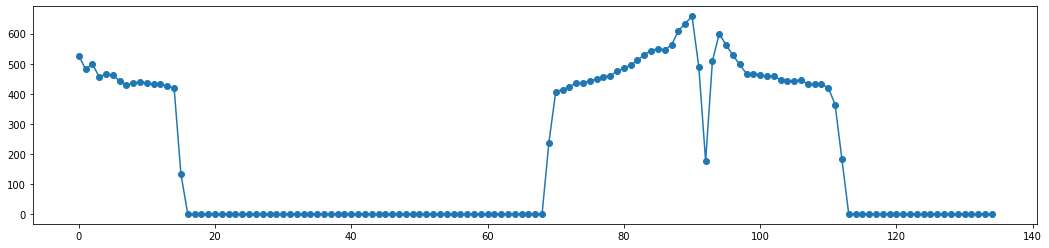

In [76]:
#neue Zeitreihe mit interpolierten Werten plotten
plt.figure(figsize=(18, 4))
data1_ip['Light'].plot(marker='o')  

Wie zufrieden sind Sie mit der Interpolation?


Interpolation fügt nur wenige Punkte hinzu => geht genauer

In [77]:
# Grundsätzlich ist auch möglich mit Polynomfunktionen zu interpolieren.
# Interpolieren Sie quadratisch (method='polynomial', order=2)
data1_quad = rawData1.copy()

data1_quad = data1_quad.interpolate(method='polynomial', order=2)

# Anzahl an NaN in Spalten ausgeben
data1_quad.isnull().sum()


Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

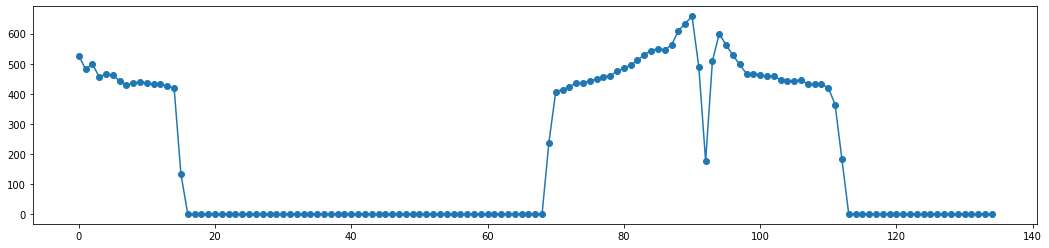

In [78]:
# Plotten Sie zum Vergleich wieder die alte und die neue Zeitreihe 
# Plot der alten Zeitreihe:
plt.figure(figsize=(18, 4))
data1_ip['Light'].plot(marker='o')  


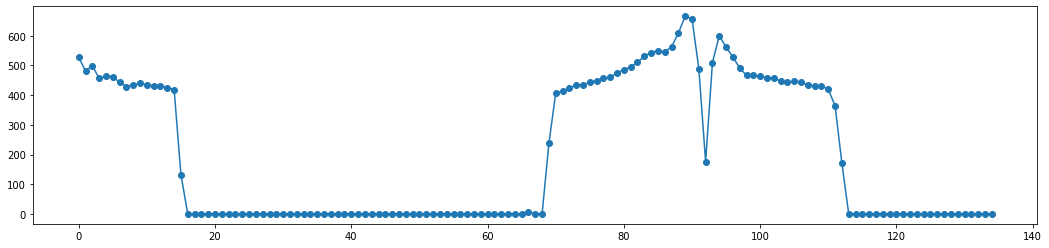

In [79]:
# Plot der neuen Zeitreihe:
plt.figure(figsize=(18, 4))
data1_quad['Light'].plot(marker='o')  

Hat sich die quadratische Interpolation im Vergleich zur linearen gelohnt? Welches der beiden Interpolationsverfahren würden Sie wählen?

Die Quadratische Interpolation ist nicht lohnenswert in diesem Fall, weil lediglich bei x ca. 68 ein Unterschied in den Datensätzen zu erkennen ist.

## Zeitstempel als Index setzen
- Momentan sind die Zeilenindizes einfach durchnummeriert: 0,1,2,...
- Wenn der Zeitstempel als Index gesetzt wird, kann man einfacher arbeiten
- Dafür muss der Zeitstempel als erstes in das Format datetime gebracht werden, damit Python ihn als Zeitstempel erkennt

In [106]:
# die Spalte Date ist noch nicht im datetime Format
data1_ip.dtypes

Date         datetime64[ns]
Energy              float64
Light               float64
CO2                 float64
Occupancy           float64
dtype: object

In [110]:
# Bringen Sie die Spalte Date ins datetime Format 
data1_ip["Date"] = pd.to_datetime(data1_ip["Date"])


In [102]:
# Indizieren Sie mit der Zeitstempel-Spalte 
data1_ip = data1_ip.set_index(data1_ip["Date"])
# Kontrollieren Sie das durch Ausgabe der ersten Zeilen des Datensatzes. 
data1_ip.head(5)

,Date,Energy,Light,CO2,Occupancy
Date,,,,,
2015-02-02 14:15:00,2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
2015-02-02 14:30:00,2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2015-02-02 14:45:00,2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
2015-02-02 15:00:00,2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
2015-02-02 15:15:00,2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


Wieso wird bei wiederholtem Ausführen obiger Zelle ein Fehler geworfen? Müssen Sie etwas am Code korrigieren?

Es wird kein Fehler geworfen

In [125]:
# Indizieren Sie auch data2 mit dessen Zeitstempel
data2["Date"] = pd.to_datetime(data2["Date"])

In [126]:
#Kontrolliere ob DType sich geändert hat
data2.dtypes

Date           datetime64[ns]
Temperature           float64
dtype: object

In [128]:
#Index setzen
data2 = data2.set_index(data2["Date"])

In [130]:
#Ausgabe der ersten Datensätze zur Kontrolle
data2.head(4)

,Date,Temperature
Date,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.657118
2015-02-02 15:00:00,2015-02-02 15:00:00,23.293950
2015-02-02 16:00:00,2015-02-02 16:00:00,22.773142
2015-02-02 17:00:00,2015-02-02 17:00:00,22.534520


## Datensätze zu einem Zusammenfügen
- Problem: Die Datensätze haben unterschiedliche Frequenzen: Datensatz 1: 15min, Datensatz 2: stündlich
- Möglichkeit 1: Nur die Indizes nehmen, die sowohl in Datensatz 1, als auch in Datensatz 2 sind, also jede volle Stunde
- Möglichkeit 2: Den Datensatz mit der höheren Frequenz (Datensatz 1) runtersamplen, z.B. indem der stündliche Mittelwert oder die Summe über je eine Stunde gebildet wird

Frage: Worauf muss man aufpassen, wenn man Möglichkeit 2 wählt?

Antwort: 
....

### Möglichkeit 1: Nur die Indizes nehmen, die sowohl in Datensatz 1, als auch in Datensatz 2 sind

In [139]:
# Neuen Datensatz definieren, der aus Datensatz 2 von rechts angehängt an Datensatz 1 besteht
data = pd.concat([data1_ip, data2], axis=1)

# Dort wo keine Werte für den jeweiligen Zeitstempel vorhanden sind, werden NaN eingefügt
data.head()

,Date,Energy,Light,CO2,Occupancy,Date,Temperature
Date,,,,,,,
2015-02-02 14:00:00,NaT,NaN,NaN,NaN,NaN,2015-02-02 14:00:00,23.657118
2015-02-02 14:15:00,2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0,NaT,NaN
2015-02-02 14:30:00,2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0,NaT,NaN
2015-02-02 14:45:00,2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0,NaT,NaN
2015-02-02 15:00:00,2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0,2015-02-02 15:00:00,23.293950


In [141]:
# Löschen Sie nun noch die Zeilen in denen mindestens 1x NaN vorkommt:
data.dropna(inplace=True)

# Ausgabe der ersten Zeilen von data zur Kontrolle:
data.head()

,Date,Energy,Light,CO2,Occupancy,Date,Temperature
Date,,,,,,,
2015-02-02 15:00:00,2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0,2015-02-02 15:00:00,23.293950
2015-02-02 16:00:00,2015-02-02 16:00:00,28.074896,429.187500,1078.897917,1.0,2015-02-02 16:00:00,22.773142
2015-02-02 17:00:00,2015-02-02 17:00:00,25.045857,431.085714,828.878571,1.0,2015-02-02 17:00:00,22.534520
2015-02-02 18:00:00,2015-02-02 18:00:00,24.919900,131.936667,782.071111,0.0,2015-02-02 18:00:00,21.993372
2015-02-02 19:00:00,2015-02-02 19:00:00,24.088542,0.000000,621.942708,0.0,2015-02-02 19:00:00,21.276331


## Möglichkeit 2: 
- Datensatz 1 soll von 15minüten auf stündliche Werte runtergesampelt werden
- Für die Spalten Light und CO2 soll dazu der stündliche Mittelwert genommen werden
- Für die Spalte Energy soll dazu jeweils die Summe über die 4 Werte in einer Stunde gebildet werden
- Für die Spalte Occupancy soll einfach der Wert zur vollen Stunde genommen werden

In [142]:
# Ursprünglicher Datensatz
data1_ip.head()

,Date,Energy,Light,CO2,Occupancy
Date,,,,,
2015-02-02 14:15:00,2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
2015-02-02 14:30:00,2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2015-02-02 14:45:00,2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
2015-02-02 15:00:00,2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
2015-02-02 15:15:00,2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


In [162]:
# Ursprünglichen Datensatz aufteilen

# nur die Spalten, die gemittelt werden sollen 
data1_mean = data1_ip.copy()
data1_mean.drop(['Energy', 'Occupancy'], axis=1, inplace=True)
data1_mean.head()

,Date,Light,CO2
Date,,,
2015-02-02 14:15:00,2015-02-02 14:15:00,527.283333,785.951515
2015-02-02 14:30:00,2015-02-02 14:30:00,481.697917,894.539583
2015-02-02 14:45:00,2015-02-02 14:45:00,499.415646,992.291327
2015-02-02 15:00:00,2015-02-02 15:00:00,456.436190,1051.151905
2015-02-02 15:15:00,2015-02-02 15:15:00,464.760417,1101.779167


In [145]:
# Generieren Sie einen Datensatz data1_sum, der nur die Spalten enthält, die summiert werden sollen
data1_sum = data1_ip.copy()
data1_sum.drop(['CO2','Light','Occupancy'],axis=1, inplace=True)
data1_sum.head()

,Date,Energy
Date,,
2015-02-02 14:15:00,2015-02-02 14:15:00,26.285636
2015-02-02 14:30:00,2015-02-02 14:30:00,27.016313
2015-02-02 14:45:00,2015-02-02 14:45:00,27.612107
2015-02-02 15:00:00,2015-02-02 15:00:00,28.006019
2015-02-02 15:15:00,2015-02-02 15:15:00,28.489948


In [237]:
# Generieren Sie einen Datensatz data1_binary, der nur die Spalten enthält, die weder gemittelt noch aufsummiert werden sollen
data1_binary = data1_ip.copy()
data1_binary.drop(['CO2','Light','Energy','Date'],axis=1,inplace=True)
data1_binary.head()

,Occupancy
Date,
2015-02-02 14:15:00,1.0
2015-02-02 14:30:00,1.0
2015-02-02 14:45:00,1.0
2015-02-02 15:00:00,1.0
2015-02-02 15:15:00,1.0


In [201]:
# Bringen Sie den Datensatz data1_mean durch Mittelwertbildung auf eine höhere Frequenz (stündlich):
#data1_resampled_mean = data1_mean.groupby([data1_mean.Date.index.hour]).mean()
data1_resampled_mean = data1_mean.resample("1H").mean()
# Lassen Sie sich zur Kontrolle die ersten Zeilen ausgeben:
data1_resampled_mean.head(4)

,Light,CO2
Date,,
2015-02-02 14:00:00,502.798965,890.927475
2015-02-02 15:00:00,456.677902,1103.590327
2015-02-02 16:00:00,434.929193,980.338952
2015-02-02 17:00:00,426.717991,821.892560


In [228]:
# Bringen Sie data1_sum durch Summenbildung auf eine höhere Frequenz (stündlich). (statt .mean() verwenden Sie .sum())
data1_resampled_sum = data1_sum.resample("1H").sum()
# Ausgabe der ersten Zeilen zur Kontrolle:
data1_resampled_sum.head()

,Energy
Date,
2015-02-02 14:00:00,80.914056
2015-02-02 15:00:00,113.657907
2015-02-02 16:00:00,106.986065
2015-02-02 17:00:00,99.873477
2015-02-02 18:00:00,98.368227


In [238]:
# Bringen Sie den Datensatz data1_binary auf eine höhere Frequenz (stündlich). 
# Dafür soll immer der Wert des Merkmals Occupancy zu vollen Stunde genommen werden, die anderen Werte sollen verworfen werden. 
data1_resampled_binary = data1_binary.resample("1H").asfreq()
# Ausgabe der ersten Zeilen zur Kontrolle:
data1_resampled_binary.head()

,Occupancy
Date,
2015-02-02 14:00:00,NaN
2015-02-02 15:00:00,1.0
2015-02-02 16:00:00,1.0
2015-02-02 17:00:00,1.0
2015-02-02 18:00:00,0.0


In [239]:
# Daten zusammenfügen
data = pd.concat([data2, data1_resampled_sum, data1_resampled_mean, data1_resampled_binary], axis=1)

data.head()

,Date,Temperature,Energy,Light,CO2,Occupancy
Date,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.657118,80.914056,502.798965,890.927475,NaN
2015-02-02 15:00:00,2015-02-02 15:00:00,23.293950,113.657907,456.677902,1103.590327,1.0
2015-02-02 16:00:00,2015-02-02 16:00:00,22.773142,106.986065,434.929193,980.338952,1.0
2015-02-02 17:00:00,2015-02-02 17:00:00,22.534520,99.873477,426.717991,821.892560,1.0
2015-02-02 18:00:00,2015-02-02 18:00:00,21.993372,98.368227,32.984167,719.712031,0.0


In [240]:
# Entfernen von Zeilen mit mind. 1x NaN falls vorhanden:
data.dropna(inplace=True)

In [241]:
# Ausgabe der ersten Zeilen von data
data.head()

,Date,Temperature,Energy,Light,CO2,Occupancy
Date,,,,,,
2015-02-02 15:00:00,2015-02-02 15:00:00,23.293950,113.657907,456.677902,1103.590327,1.0
2015-02-02 16:00:00,2015-02-02 16:00:00,22.773142,106.986065,434.929193,980.338952,1.0
2015-02-02 17:00:00,2015-02-02 17:00:00,22.534520,99.873477,426.717991,821.892560,1.0
2015-02-02 18:00:00,2015-02-02 18:00:00,21.993372,98.368227,32.984167,719.712031,0.0
2015-02-02 19:00:00,2015-02-02 19:00:00,21.276331,95.371880,0.000000,585.110384,0.0


In [242]:
# Ausgabe der Anzahl NaN in den jeweiligen Spalten

data.isna().sum()

Date           0
Temperature    0
Energy         0
Light          0
CO2            0
Occupancy      0
dtype: int64